In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
import seaborn as sns

warnings.filterwarnings("ignore", message="Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.")


# Load the dataset
file_path = 'netflix1.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
print("Initial Data Preview:\n", df.head())

# Data Info
print("\nData Information:\n")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop missing values
df.dropna(inplace=True)

# Data Cleaning - Remove duplicates
df.drop_duplicates(inplace=True)

# Data Types Analysis
print("\nData Types:\n", df.dtypes)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extracting Year and Month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# EDA - Content Types Distribution




Initial Data Preview:
   show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  


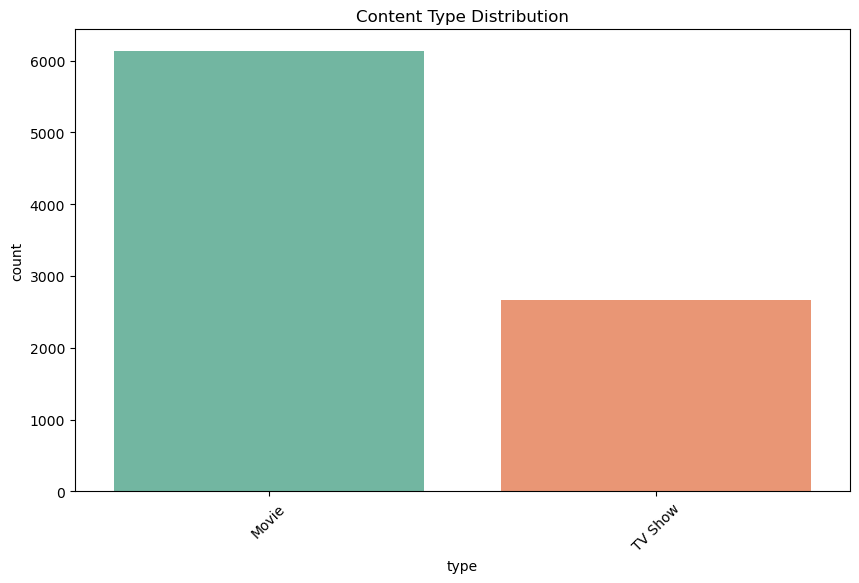

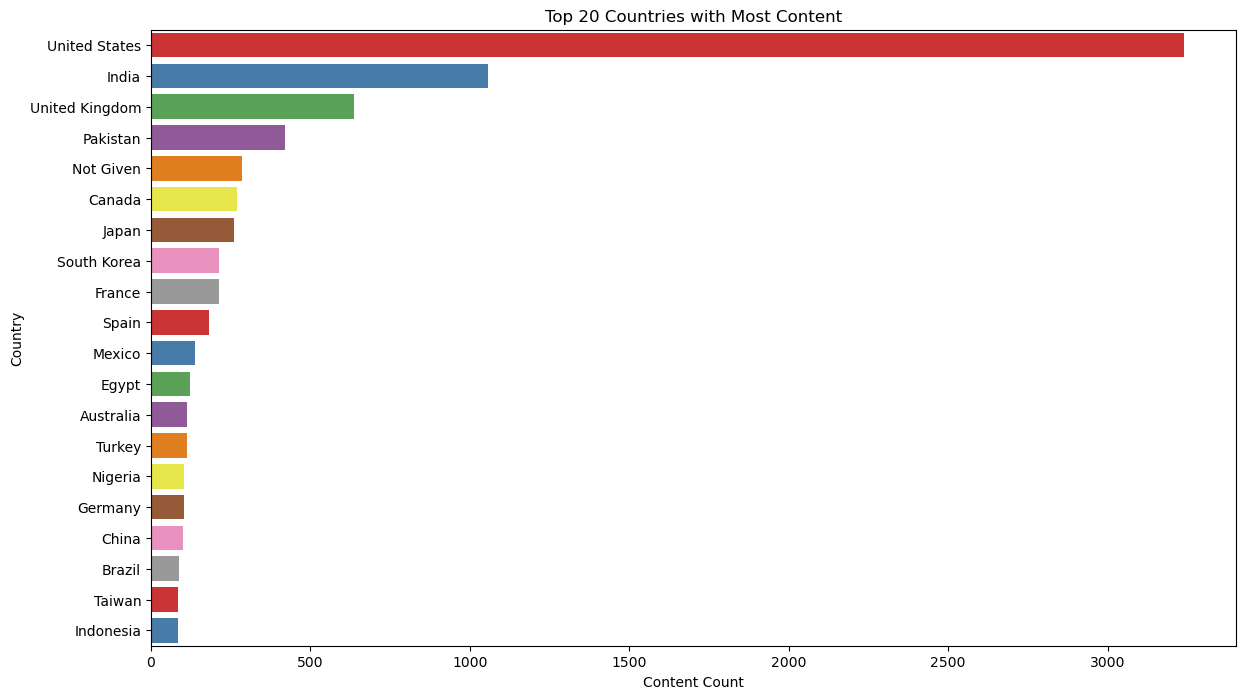

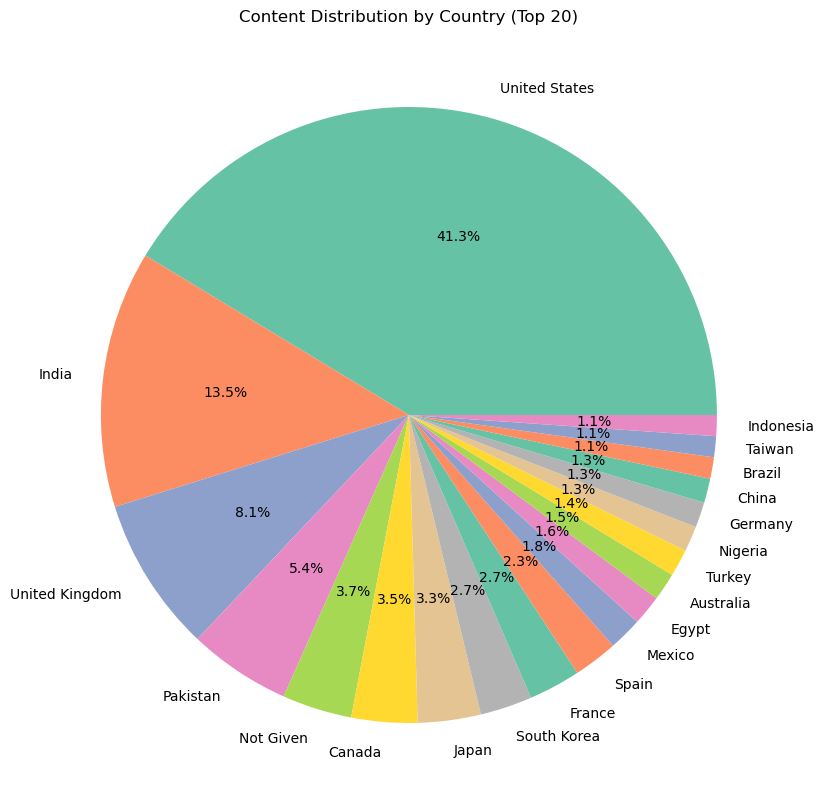

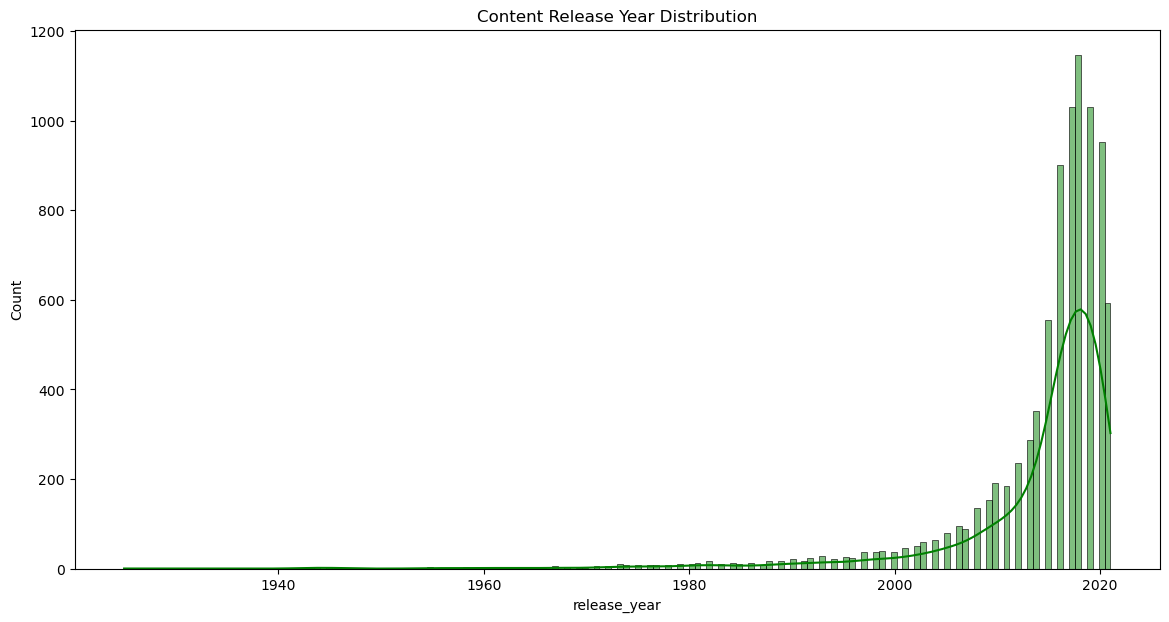

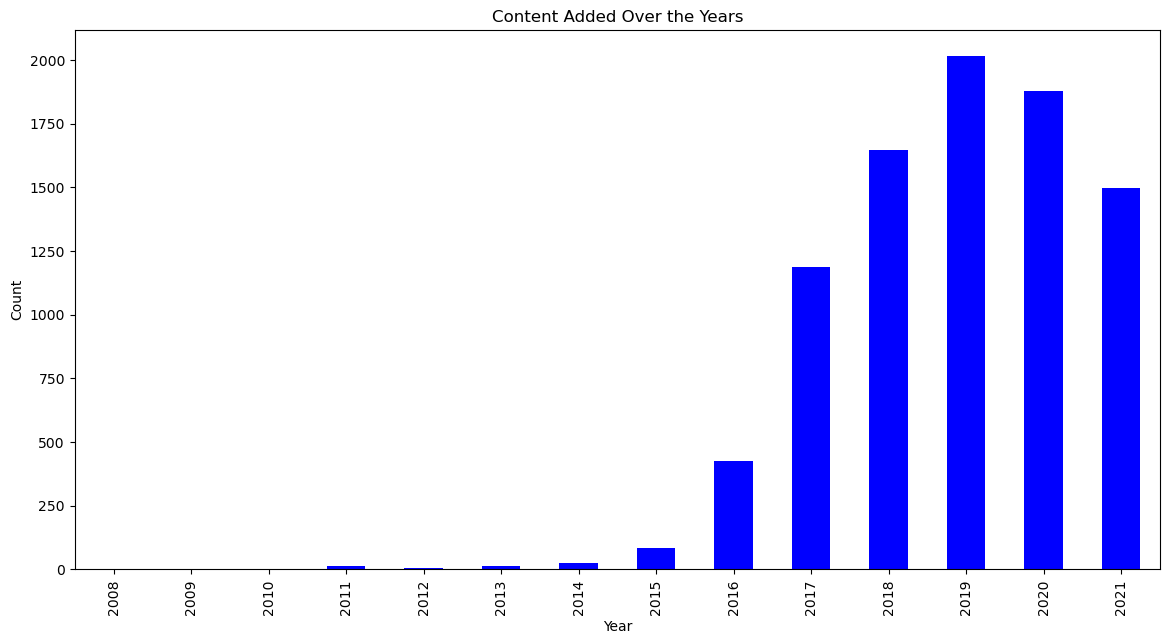

In [6]:
# EDA - Content Types Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Top 20 Countries with Most Content
plt.figure(figsize=(14, 8))
country_count = df['country'].value_counts().head(20)
sns.barplot(x=country_count.values, y=country_count.index, palette='Set1')
plt.title('Top 20 Countries with Most Content')
plt.xlabel('Content Count')
plt.ylabel('Country')
plt.show()

# Pie Chart - Top 20 Countries Content Distribution
plt.figure(figsize=(10, 10))
plt.pie(country_count, labels=country_count.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', 20))
plt.title('Content Distribution by Country (Top 20)')
plt.show()

# Release Year Analysis
plt.figure(figsize=(14, 7))
sns.histplot(df['release_year'], kde=True, color='green')
plt.title('Content Release Year Distribution')
plt.show()

# Content Added Over Time
plt.figure(figsize=(14, 7))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [7]:
# Feature Engineering
# Extract Duration in Minutes and Count Genres
import numpy as np

df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else np.nan)
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(', ')))

# Display New Features
print("\nNew Features Preview:\n", df[['duration_minutes', 'genre_count']].head())

# Next Steps - Feature Engineering, ML, and Advanced Visualization
print("\nNext Steps:")
print("1. Feature Engineering: Duration in minutes and genre count added.")
print("2. Machine Learning: Ready for model building (recommendations, trend prediction).")
print("3. Advanced Visualization: Implement interactive plots/dashboards.")


New Features Preview:
    duration_minutes  genre_count
0              90.0            1
1               NaN            3
2               NaN            3
3              91.0            2
4             125.0            3

Next Steps:
1. Feature Engineering: Duration in minutes and genre count added.
2. Machine Learning: Ready for model building (recommendations, trend prediction).
3. Advanced Visualization: Implement interactive plots/dashboards.
